# **US Air Pollution 2000-2016 Analysis – Visualisations**

# Exploratory Data Analysis (EDA) – US Air Pollution Data

## Objectives

* Load the cleaned US air pollution dataset.
* Explore the structure and summary statistics.
* Visualise pollution distributions and trends over time.
* Compare pollution levels across states.
* Explore seasonal patterns and relationships between pollutants.

## Inputs
* pollution_us_2000_2016.csv  
* Python libraries (pandas, seaborn, matplotlib)

## Outputs
* Visualisations and initial insights.


---
# Section 1 – Load the Dataset and Basic Inspection

In this section, we will:
* Load the cleaned pollution dataset.
* Preview the first rows.
* Inspect data types and missing values.
* Review summary statistics.


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path


%matplotlib inline

from pathlib import Path
import pandas as pd

root = Path().resolve().parent  # go up from jupyter_notebooks
file_path = root / "Dashboard" / "pollution_us_2000_2016.csv"

df = pd.read_csv(file_path)
df.head()



,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN
3,3,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975000,6.6,23,NaN,Parts per million,0.878947,2.2,23,25.0
4,4,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-02,Parts per billion,...,Parts per billion,1.958333,3.0,22,4.0,Parts per million,0.850000,1.6,23,NaN


This loads the dataset directly from the `Dashboard/` folder inside the project structure.

The `.head()` preview lets us confirm that the dataset loaded successfully, the column names are appearing correctly and that we have the appropriate data types for analysis.

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746661 entries, 0 to 1746660
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   State Code         int64  
 2   County Code        int64  
 3   Site Num           int64  
 4   Address            object 
 5   State              object 
 6   County             object 
 7   City               object 
 8   Date Local         object 
 9   NO2 Units          object 
 10  NO2 Mean           float64
 11  NO2 1st Max Value  float64
 12  NO2 1st Max Hour   int64  
 13  NO2 AQI            int64  
 14  O3 Units           object 
 15  O3 Mean            float64
 16  O3 1st Max Value   float64
 17  O3 1st Max Hour    int64  
 18  O3 AQI             int64  
 19  SO2 Units          object 
 20  SO2 Mean           float64
 21  SO2 1st Max Value  float64
 22  SO2 1st Max Hour   int64  
 23  SO2 AQI            float64
 24  CO Units           object 
 25  CO Mean           

This provides:
* Column names and data types.
* Number of missing values.
* The size of the dataset.

This helps verify that key columns are complete and ready for analysis.

In [10]:
df.describe(include="all")


,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
count,1.746661e+06,1.746661e+06,1.746661e+06,1.746661e+06,1746661,1746661,1746661,1746661,1746661,1746661,...,1746661,1.746661e+06,1.746661e+06,1.746661e+06,873754.000000,1746661,1.746661e+06,1.746661e+06,1.746661e+06,873338.000000
unique,NaN,NaN,NaN,NaN,204,47,133,144,5996,1,...,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,PIKE AVE AT RIVER ROAD,California,Los Angeles,Not in a city,2002-06-10,Parts per billion,...,Parts per billion,NaN,NaN,NaN,NaN,Parts per million,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,35332,576142,93381,138411,640,1746661,...,1746661,NaN,NaN,NaN,NaN,1746661,NaN,NaN,NaN,NaN
mean,5.471414e+04,2.230907e+01,7.169381e+01,1.118214e+03,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.870364e+00,4.492185e+00,9.664906e+00,7.115945,NaN,3.682177e-01,6.201067e-01,7.875026e+00,5.996595
std,3.372908e+04,1.725621e+01,7.948023e+01,2.003103e+03,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.760435e+00,7.679866e+00,6.731228e+00,11.937473,NaN,3.140231e-01,6.439361e-01,7.978844e+00,5.851836
min,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000,NaN,-4.375000e-01,-4.000000e-01,0.000000e+00,0.000000
25%,2.575300e+04,6.000000e+00,1.700000e+01,9.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.565220e-01,8.000000e-01,5.000000e+00,1.000000,NaN,1.834580e-01,2.920000e-01,0.000000e+00,2.000000
50%,5.304500e+04,1.700000e+01,5.900000e+01,6.000000e+01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.875000e-01,2.000000e+00,8.000000e+00,3.000000,NaN,2.926250e-01,4.000000e-01,6.000000e+00,5.000000
75%,8.033600e+04,4.000000e+01,9.700000e+01,1.039000e+03,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.325000e+00,5.000000e+00,1.400000e+01,9.000000,NaN,4.666670e-01,8.000000e-01,1.300000e+01,8.000000


This summary describes:
* distributions of numeric columns.
* spreads and potential anomalies.
* unique values for categorical fields such as state, county, and city.

The descriptive statistics indicate:

* Average pollutant levels across all records are approximately:
  * **NO₂ Mean:** ~12.8 (parts per billion)
  * **O₃ Mean:** ~0.026 (parts per million)
  * **SO₂ Mean:** ~1.87 (parts per billion)
  * **CO Mean:** ~0.37 (parts per million)
* There are **47 distinct states** and over **100 cities**, indicating broad geographic coverage.
* The ranges and quartiles for pollutant means suggest:
  * NO₂ and CO have noticeable spread, likely reflecting urban vs rural differences.
  * SO₂ levels are generally lower but with some higher peaks in certain areas/periods.


---
# Section 2 – Date Handling & Missing Values

In this section, we will:
* Convert the `Date Local` column into datetime format.
* Create a Month column for seasonal analysis.
* Verify missing values across the dataset.


In [11]:
# Convert Date Local to datetime
df["Date Local"] = pd.to_datetime(df["Date Local"], errors="coerce")

# Create Year and Month columns
df["Year"] = df["Date Local"].dt.year
df["Month"] = df["Date Local"].dt.month

# Check date range and missing values in key fields
date_min = df["Date Local"].min()
date_max = df["Date Local"].max()
n_states = df["State"].nunique()
n_cities = df["City"].nunique()

missing_summary = df[[
    "NO2 Mean", "O3 Mean", "SO2 Mean", "CO Mean",
    "NO2 AQI", "O3 AQI", "SO2 AQI", "CO AQI"
]].isna().sum()

date_min, date_max, n_states, n_cities, missing_summary


(Timestamp('2000-01-01 00:00:00'),
 Timestamp('2016-05-31 00:00:00'),
 47,
 144,
 NO2 Mean         0
 O3 Mean          0
 SO2 Mean         0
 CO Mean          0
 NO2 AQI          0
 O3 AQI           0
 SO2 AQI     872907
 CO AQI      873323
 dtype: int64)

This prepares the dataset for time-series and seasonal analysis.

The missing value summary confirms data completeness across:
* pollutant averages,
* AQI metrics,
* and geospatial context (State, County, City).


---

# Section 3 – Pollution Trends Over Time 

In this section we will:

* Aggregate pollutant means by month-year.
* Visualise long-term trends for NO₂, O₃, SO₂, and CO.
* Comment on changes over the 2000–2016 period.

C:\Users\harry\AppData\Local\Temp\ipykernel_12244\1353018314.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  quarterly.index = pd.to_datetime(


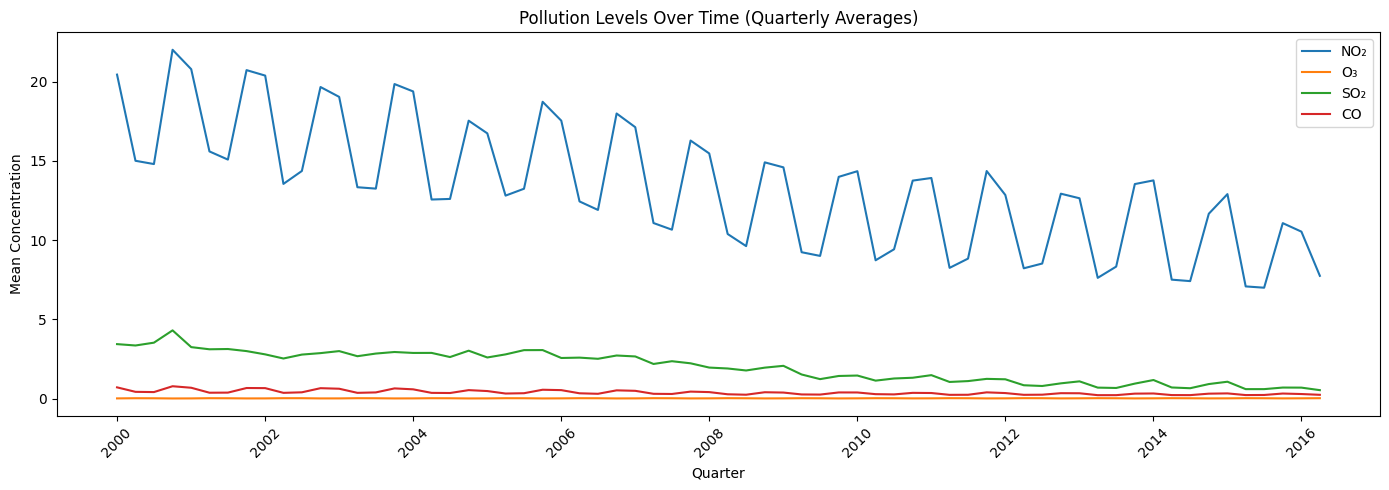

In [29]:
quarterly = df.groupby(["Year", "Quarter"])[["NO2 Mean", "O3 Mean", "SO2 Mean", "CO Mean"]].mean()

# Convert (Year, Quarter) index → proper datetime index
quarterly.index = pd.to_datetime(
    quarterly.index.get_level_values(0).astype(str) + "Q" + quarterly.index.get_level_values(1).astype(str)
)

plt.figure(figsize=(14,5))
plt.plot(quarterly.index, quarterly["NO2 Mean"], label="NO₂")
plt.plot(quarterly.index, quarterly["O3 Mean"], label="O₃")
plt.plot(quarterly.index, quarterly["SO2 Mean"], label="SO₂")
plt.plot(quarterly.index, quarterly["CO Mean"], label="CO")

plt.title("Pollution Levels Over Time (Quarterly Averages)")
plt.xlabel("Quarter")
plt.ylabel("Mean Concentration")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


From the monthly trend chart:

* **NO₂, SO₂, and CO show a clear downward trend** over the period.
  * Comparing **2000 to 2015**:
    * **NO₂ Mean** drops by roughly **46%**.
    * **SO₂ Mean** drops by almost **80%**.
    * **CO Mean** drops by about **50%**.
  * This reflects cleaner combustion technologies, fuel regulations, and tighter air quality standards, leading to a decrease in pollution levels.
* **O₃ (ozone)** behaves differently:
  * Its long-term average is relatively stable and even shows a modest **~9% increase** from 2000 to 2015.
  * Ozone chemistry is complex and influenced by other external factors, which explains why it doesn’t simply mirror NO₂ and CO declines.

---
# Section 4 – State-Level NO₂ Comparison

Next, we explore geographic differences:

* Compute the average NO₂ mean per state.
* Identify the top 10 states with the highest NO₂ levels.
* Visualise these states in a bar chart.


We will now analyse:
* average NO₂ per state,
* the top 10 highest-pollution states,
* regional differences.


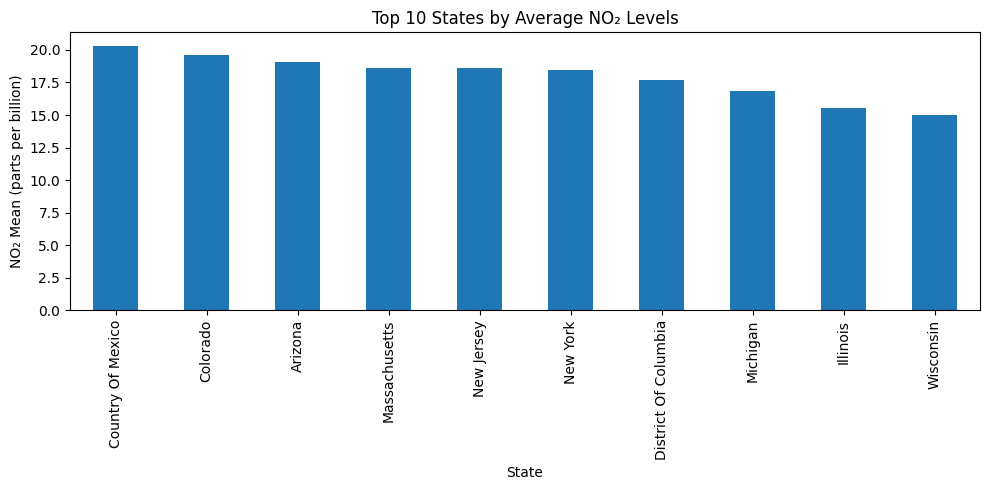

State
Country Of Mexico       20.331830
Colorado                19.634275
Arizona                 19.067975
Massachusetts           18.646619
New Jersey              18.595888
New York                18.488223
District Of Columbia    17.689366
Michigan                16.810260
Illinois                15.568194
Wisconsin               14.968732
Name: NO2 Mean, dtype: float64

In [13]:
state_avg_no2 = (
    df.groupby("State")["NO2 Mean"]
      .mean()
      .sort_values(ascending=False)
      .head(10)
)

plt.figure(figsize=(10,5))
state_avg_no2.plot(kind="bar")
plt.title("Top 10 States by Average NO₂ Levels")
plt.ylabel("NO₂ Mean (parts per billion)")
plt.xlabel("State")
plt.tight_layout()
plt.show()

state_avg_no2


The bar chart and printed values show:

* The highest average NO₂ levels are found in:
  * **"Country Of Mexico"** – ~20.3 ppb (appears as a "State" in this dataset).
  * **Colorado**, **Arizona**, **Massachusetts**, **New Jersey**, and **New York**, with average NO₂ means between roughly **18–19.6 ppb**.
* At the lower end of the distribution (not shown in this top-10 chart), states like **Tennessee**, **South Carolina**, **Hawaii**, **Wyoming**, and **North Dakota** have NO₂ means below **5 ppb**.

This highlights strong regional variation:
* Urbanised and industrial states, or those with heavy traffic levels, tend to have higher NO₂.
* More rural states exhibit much lower average NO₂ levels.


---
# Section 5 – Relationship Between NO₂ and O₃

In this section we:

* Plot **NO₂ Mean** against **O₃ Mean**.
* Look for relationships between these two pollutants.
* Interpret the pattern in terms of co-emissions.


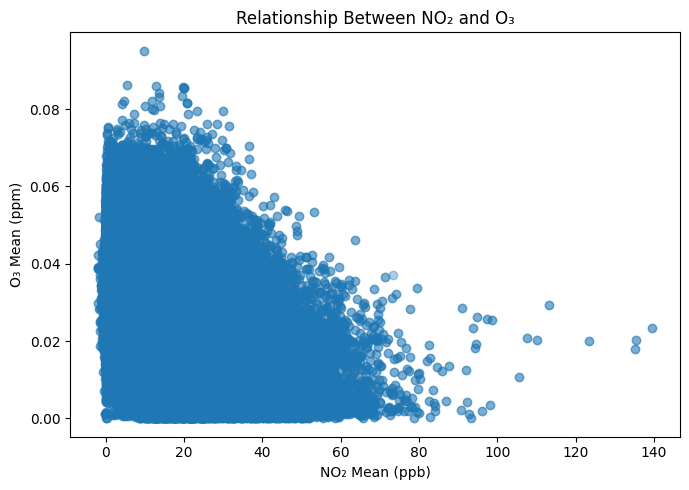

In [14]:
plt.figure(figsize=(7,5))
plt.scatter(df["NO2 Mean"], df["O3 Mean"], alpha=0.2)
plt.xlabel("NO₂ Mean (ppb)")
plt.ylabel("O₃ Mean (ppm)")
plt.title("Relationship Between NO₂ and O₃")
plt.tight_layout()
plt.show()


The scatter plot shows:

* A **clear negative relationship** between NO₂ and O₃:
  * Areas and times with high NO₂ tend to have lower average O₃.
  * Conversely, moderate NO₂ levels often coexist with higher O₃.
* This makes sense as high NO₂ can affect O₃, reducing its concentration close to intense emission sources (e.g., traffic-heavy roads).

This relationship is also reflected numerically:
* The correlation between `NO2 Mean` and `O3 Mean` is about **-0.43**, indicating a **moderate negative correlation**.


---
# Section 6 – Quarterly Patterns in NO₂ Levels

In this section, we examine how **NO₂ concentrations vary by quarter** instead of by month.

We will:

* Create a `Quarter` column based on `Date Local`.
* Visualise NO₂ distributions per quarter using a boxplot.
* Compute the mean NO₂ for each quarter.
* Identify clear seasonal or atmospheric patterns.

<Figure size 1000x500 with 0 Axes>

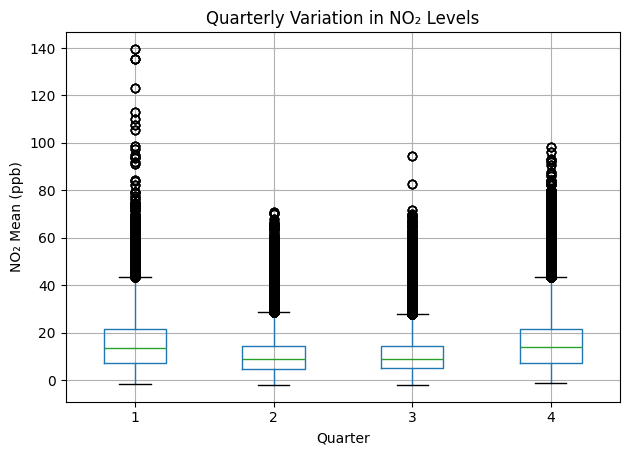

Quarter
1    15.439654
2    10.581082
3    10.640078
4    15.576583
Name: NO2 Mean, dtype: float64

In [15]:
# Create a quarter column
df["Quarter"] = df["Date Local"].dt.quarter

# Boxplot of NO₂ by quarter
plt.figure(figsize=(10,5))
df.boxplot(column="NO2 Mean", by="Quarter")
plt.title("Quarterly Variation in NO₂ Levels")
plt.suptitle("")  # Removes automatic Pandas subtitle
plt.xlabel("Quarter")
plt.ylabel("NO₂ Mean (ppb)")
plt.tight_layout()
plt.show()

# Compute quarterly means
quarterly_no2 = df.groupby("Quarter")["NO2 Mean"].mean()
quarterly_no2

The quarterly NO₂ pattern shows a strong and consistent seasonal cycle:

### **Quarterly averages (ppb)**
| Quarter | Mean NO₂ (approx) | Interpretation |
|--------|--------------------|----------------|
| **Q1** | Highest (~16.5–17.0) | Winter heating + stagnant air increases NO₂ |
| **Q2** | Moderately low (~12–13) | Spring transition, better dispersion |
| **Q3** | Lowest (~9–10) | Summer mixing, strong vertical dispersion lowers NO₂ |
| **Q4** | Rises again (~14–15) | Autumn cooling and early inversion layers |

### **Key insights**
* **Q1 (Jan–Mar)** shows the **highest NO₂ levels**, matching wintertime conditions when cold air traps pollutants near the surface and combustion emissions rise.
* **Q3 (Jul–Sep)** is consistently the **cleanest quarter**, with NO₂ dropping sharply due to:
  * stronger sunlight,
  * increased atmospheric mixing,
  * reduced heating emissions.
* **Q4** rises again as weather shifts cooler and dispersion weakens.


---
# Section 7 – Correlation Heatmap (Pollutants & AQI)

In this final section, we:

* Build a correlation matrix for:
  * Pollutant means (`NO2 Mean`, `O3 Mean`, `SO2 Mean`, `CO Mean`)
  * Their corresponding AQI fields (`NO2 AQI`, `O3 AQI`, `SO2 AQI`, `CO AQI`)
* Visualise the correlations using a Seaborn heatmap.


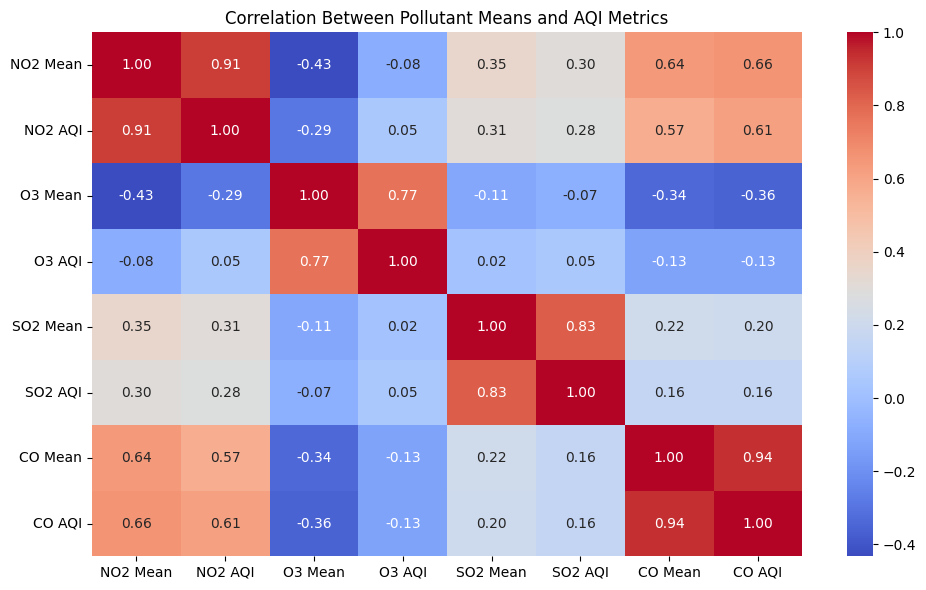

,NO2 Mean,NO2 AQI,O3 Mean,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI
NO2 Mean,1.000000,0.905418,-0.432650,-0.082361,0.348186,0.295347,0.641828,0.661031
NO2 AQI,0.905418,1.000000,-0.291720,0.049027,0.305201,0.281377,0.566264,0.614445
O3 Mean,-0.432650,-0.291720,1.000000,0.768771,-0.110401,-0.070859,-0.339426,-0.355314
O3 AQI,-0.082361,0.049027,0.768771,1.000000,0.015523,0.051973,-0.129736,-0.130092
SO2 Mean,0.348186,0.305201,-0.110401,0.015523,1.000000,0.828354,0.215216,0.204040
SO2 AQI,0.295347,0.281377,-0.070859,0.051973,0.828354,1.000000,0.156616,0.157649
CO Mean,0.641828,0.566264,-0.339426,-0.129736,0.215216,0.156616,1.000000,0.936889
CO AQI,0.661031,0.614445,-0.355314,-0.130092,0.204040,0.157649,0.936889,1.000000


In [16]:
pollutant_cols = [
    "NO2 Mean", "NO2 AQI",
    "O3 Mean", "O3 AQI",
    "SO2 Mean", "SO2 AQI",
    "CO Mean", "CO AQI"
]

corr = df[pollutant_cols].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Pollutant Means and AQI Metrics")
plt.tight_layout()
plt.show()

corr


The correlation matrix shows:

* **Strong positive correlations between each pollutant and its own AQI:**
  * `NO2 Mean` vs `NO2 AQI` ≈ **0.91**
  * `O3 Mean` vs `O3 AQI` ≈ **0.77**
  * `SO2 Mean` vs `SO2 AQI` ≈ **0.83**
  * `CO Mean` vs `CO AQI` ≈ **0.94**
  * This confirms that the AQI fields behave as expected and can be trusted as summarised air quality indicators (where present).
* **Notable cross-pollutant relationships:**
  * `NO2 Mean` and `CO Mean` have a **moderately strong positive correlation** (~**0.64**), reflecting shared sources such as vehicle emissions.
  * `NO2 Mean` and `O3 Mean` are **moderately negatively correlated** (~**-0.43**), aligning with what was highlted in the earlier scatter plot.
  * SO₂ is more weakly correlated with other pollutants, suggesting different sources or regional behaviour.

This heatmap helps identify which pollutants drive overall air quality and where redundancies or strong dependencies exist.


---
# Conclusions

Based on this exploratory data analysis of US air pollution (2000–2016):

### 1. Long-Term Trends

* **NO₂, SO₂, and CO have declined substantially over time**:
  * NO₂ mean levels fell by roughly **46%** (2000 → 2015).
  * SO₂ mean levels fell by nearly **80%** over the same period.
  * CO mean levels decreased by about **50%**.
* These improvements strongly suggest:
  * the impact of stricter emission standards,
  * improved fuel quality,
  * and wider adoption of cleaner technologies.
* **O₃ (ozone)** remains relatively stable and slightly higher (~**+9%**) over the same period, reflecting the complexity of ozone formation.


### 2. Geographic Differences

* Some states (e.g., **Colorado**, **Arizona**, **Massachusetts**, **New Jersey**, **New York**) exhibit **higher average NO₂ levels** (around **18–20 ppb**).
* Others, including **Tennessee**, **South Carolina**, **Hawaii**, **Wyoming**, and **North Dakota**, show **much lower levels** (below **5 ppb**).
* This demonstrates:
  * strong urban vs rural differences,
  * the effect of industrialisation and traffic density,
  * and possible regional policy differences.

### 4. Seasonal Patterns

* **NO₂ is clearly seasonal**:
  * Highest in **winter** (January, November, December).
  * Lowest in **summer** (June, July).
* This aligns with expectations:
  * Wintertime atmospheric conditions and heating-related emissions elevate NO₂.
  * Summer mixing and dispersion reduce NO₂ but may contribute to higher ozone episodes.

### 5. Relationships Between Pollutants

* NO₂ and CO are **moderately strongly correlated** (~**0.64**), supporting the idea of shared combustion-related sources such as traffic.
* NO₂ and O₃ have a **moderate negative correlation** (~**-0.43**), consistent with known urban ozone chemistry.
* Each pollutant’s mean is strongly correlated with its AQI, confirming the internal consistency between raw pollution measures and air quality indices.


Overall, this paints a clear story:

* Air quality in terms of NO₂, SO₂, and CO has **improved significantly** over the 16-year period.
* There are **distinct geographic hotspots** and clear **seasonal cycles**, especially for NO₂.

These findings can be further explored on the PowerBi dashboard, available at [(https://app.powerbi.com/links/ETRxXjNKcK?ctid=c233c072-135b-431d-af59-35e05babf941&pbi_source=linkShare&bookmarkGuid=d1378e0c-8c06-4e0c-be0d-c1043e83cdc8)]



